In [51]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
rxh9_filename = "/Users/David/Documents/TickData/RXH6 Comdty.csv"
gh9filename = "/Users/David/Documents/TickData/G H6 Comdty.csv"
rx_raw = pd.read_csv(rxh9_filename, index_col = 0, header = 0, names=["DateTime","close"]).dropna()
rx_raw.index = pd.to_datetime(rx_raw.index, format='%d/%m/%Y %H:%M:%S')
rx_raw["close"] = rx_raw["close"].apply(np.float)
g_raw = pd.read_csv(gh9filename, index_col = 0, header = 0, names=["DateTime","close"]).dropna()
g_raw=g_raw.sort_index()
g_raw.head()
g_raw.index = pd.to_datetime(g_raw.index, format='%d/%m/%Y %H:%M:%S')
g_raw["close"] = g_raw["close"].apply(np.float)
rx_rawr = rx_raw.sort_index()
rx_raw.head()
#pd.to_numeric(mf.columns(), errors="coerce")

,close
DateTime,
2015-12-08 07:02:00,158.41
2015-12-08 07:03:00,158.46
2015-12-08 07:04:00,158.48
2015-12-08 07:05:00,158.46
2015-12-08 07:06:00,158.47


In [2]:
pairs = pd.DataFrame(index=g_raw.index)
pairs['RX_close'] = rx_raw['close']
pairs['G_close'] = g_raw['close']
pairs = pairs.dropna()
#pairs.index = pd.to_datetime(pairs.index)
#pairs.head()
pairs.index

DatetimeIndex(['2016-02-01 08:00:00', '2016-02-01 08:01:00',
               '2016-02-01 08:02:00', '2016-02-01 08:03:00',
               '2016-02-01 08:04:00', '2016-02-01 08:05:00',
               '2016-02-01 08:06:00', '2016-02-01 08:07:00',
               '2016-02-01 08:08:00', '2016-02-01 08:09:00',
               ...
               '2015-12-30 17:50:00', '2015-12-30 17:51:00',
               '2015-12-30 17:52:00', '2015-12-30 17:53:00',
               '2015-12-30 17:54:00', '2015-12-30 17:55:00',
               '2015-12-30 17:56:00', '2015-12-30 17:57:00',
               '2015-12-30 17:58:00', '2015-12-30 17:59:00'],
              dtype='datetime64[ns]', name='DateTime', length=30427, freq=None)

In [3]:
pairs['Spread'] = pairs['RX_close'] - pairs['G_close']
pairs.head()
pairs = pairs["20151215":"20160224"]

In [93]:
groups = pairs.groupby([pairs.index.year, pairs.index.month, pairs.index.day]).resample('H').ohlc()
#pairs.groupby([pairs.index.year, pairs.index.month, pairs.index.day])[2015,12,15]
groups.index

MultiIndex(levels=[[2015, 2016], [1, 2, 12], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [2015-12-15 08:00:00, 2015-12-15 09:00:00, 2015-12-15 10:00:00, 2015-12-15 11:00:00, 2015-12-15 12:00:00, 2015-12-15 13:00:00, 2015-12-15 14:00:00, 2015-12-15 15:00:00, 2015-12-15 16:00:00, 2015-12-15 17:00:00, 2015-12-16 08:00:00, 2015-12-16 09:00:00, 2015-12-16 10:00:00, 2015-12-16 11:00:00, 2015-12-16 12:00:00, 2015-12-16 13:00:00, 2015-12-16 14:00:00, 2015-12-16 15:00:00, 2015-12-16 16:00:00, 2015-12-16 17:00:00, 2015-12-17 08:00:00, 2015-12-17 09:00:00, 2015-12-17 10:00:00, 2015-12-17 11:00:00, 2015-12-17 12:00:00, 2015-12-17 13:00:00, 2015-12-17 14:00:00, 2015-12-17 15:00:00, 2015-12-17 16:00:00, 2015-12-17 17:00:00, 2015-12-18 08:00:00, 2015-12-18 09:00:00, 2015-12-18 10:00:00, 2015-12-18 11:00:00, 2015-12-18 12:00:00, 2015-12-18 13:00:00, 2015-12-18 14:00:00, 2015-12-18 15:00:00, 2015-12-18 16:00:00, 2015-12-18 17:00:00, 2

In [94]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

def hurst(ts):
	"""Returns the Hurst Exponent of the time series vector ts"""
	# Create the range of lag values
	lags = range(2, 100)

	# Calculate the array of the variances of the lagged differences
	tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

	# Use a linear fit to estimate the Hurst Exponent
	poly = polyfit(log(lags), log(tau), 1)

	# Return the Hurst exponent from the polyfit output
	return poly[0]*2.0

In [95]:
g = groups.loc[slice(None),(slice(None),"close")]
u = groups.loc[slice(None),(slice(None),"open")]
t = g - u
groups.xs((2016,2,23))
#groups.groupby(level=1, axis =1)
#g["G_close"] - u["G_close"]
e = groups.copy()
#e["close"]
#e.loc[slice(None),(slice(None))]
#e.loc["RX_close"]
e.columns = e.columns.swaplevel(0,1)
e = e.stack(1)
#e = e.swaplevel(1,0, axis = 1)
e["strength"] = e["close"] - e["open"]
e.unstack(4)
#e.loc[(slice(None),slice("close"))]


open                    high          \
                               RX_close G_close Spread RX_close G_close   
           DateTime                                                       
2015 12 15 2015-12-15 08:00:00   158.67  117.64  41.03   158.70  117.69   
           2015-12-15 09:00:00   158.30  117.46  40.84   158.32  117.46   
           2015-12-15 10:00:00   157.86  117.24  40.62   157.94  117.29   
           2015-12-15 11:00:00   157.59  116.94  40.65   157.71  117.03   
           2015-12-15 12:00:00   157.45  116.97  40.48   157.65  117.11   
           2015-12-15 13:00:00   157.69  117.05  40.64   157.75  117.05   
           2015-12-15 14:00:00   157.37  116.71  40.66   157.60  116.88   
           2015-12-15 15:00:00   157.54  116.84  40.70   157.65  116.91   
           2015-12-15 16:00:00   157.50  116.73  40.77   157.84  116.86   
           2015-12-15 17:00:00   157.78  116.83  40.95   157.82  116.84   
        16 2015-12-16 08:00:00   157.71  116.81  40.90   157.91  116.87   
           2015-12-16 09:00:00   157.84  116.82  41.02   157.90  116.91   
           2015-12-16 10:00:00   157.87  116.87  41.00   157.87  116.96   
           2015-12-16 11:00:00   157.88  116.89  40.99   157.91  116.97   
           2015-12-16 12:00:00   157.72  116.90  40.82   157.77  116.95   
           2015-12-16 13:00:00   157.60  116.86  40.74   157.63  116.86   
           2015-12-16 14:00:00   157.45  116.82  40.63   157.58  116.92   
           2015-12-16 15:00:00   157.44  116.87  40.57   157.50  116.89   
           2015-12-16 16:00:00   157.33  116.78  40.55   157.36  116.83   
           2015-12-16 17:00:00   157.29  116.76  40.53   157.34  116.82   
        17 2015-12-17 08:00:00   157.67  117.03  40.64   158.35  117.46   
           2015-12-17 09:00:00   158.15  117.29  40.86   158.38  117.44   
           2015-12-17 10:00:00   158.38  117.45  40.93   158.48  117.57   
           2015-12-17 11:00:00   158.38  117.49  40.89   158.42  117.62   
           2015-12-17 12:00:00   158.38  117.61  40.77   158.38  117.61   
           2015-12-17 13:00:00   158.30  117.44  40.86   158.41  117.51   
           2015-12-17 14:00:00   158.39  117.42  40.97   158.40  117.43   
           2015-12-17 15:00:00   158.11  117.28  40.83   158.37  117.67   
           2015-12-17 16:00:00   158.25  117.60  40.65   158.40  117.71   
           2015-12-17 17:00:00   158.40  117.70  40.70   158.44  117.82   
...                                 ...     ...    ...      ...     ...   
2016 2  22 2016-02-22 08:00:00   165.07  121.65  43.42   165.26  121.75   
           2016-02-22 09:00:00   165.24  121.72  43.52   165.31  121.78   
           2016-02-22 10:00:00   165.13  121.70  43.43   165.14  121.70   
           2016-02-22 11:00:00   165.06  121.65  43.41   165.12  121.66   
           2016-02-22 12:00:00   165.12  121.66  43.46   165.26  121.85   
           2016-02-22 13:00:00   165.18  121.78  43.40   165.27  121.90   
           2016-02-22 14:00:00   165.26  121.89  43.37   165.46  122.08   
           2016-02-22 15:00:00   165.42  122.01  43.41   165.49  122.15   
           2016-02-22 16:00:00   165.48  122.10  43.38   165.56  122.13   
           2016-02-22 17:00:00   165.50  122.07  43.43   165.51  122.09   
        23 2016-02-23 08:00:00   165.37  122.07  43.30   165.52  122.14   
           2016-02-23 09:00:00   165.40  121.91  43.49   165.55  122.02   
           2016-02-23 10:00:00   165.46  121.93  43.53   165.53  121.94   
           2016-02-23 11:00:00   165.40  121.87  43.53   165.40  121.87   
           2016-02-23 12:00:00   165.22  121.62  43.60   165.25  121.62   
           2016-02-23 13:00:00   165.19  121.52  43.67   165.26  121.57   
           2016-02-23 14:00:00   164.87  121.18  43.69   164.92  121.38   
           2016-02-23 15:00:00   164.90  121.35  43.55   165.40  121.82   
           2016-02-23 16:00:00   165.42  121.81  43.61   165.48  121.90   
           2016-02-23 17:00:00   165.40  121.71  43.69   165

In [96]:
rx_part = groups
r = rx_part.loc[slice(None),( slice(None),slice(None))]
r = r - r.shift(1)
old_cols = rx_part.columns.get_level_values(1).unique()
new_cols = old_cols +"_chg"

r.rename(columns=dict(zip(old_cols,new_cols)), inplace = True)
#pd.concat([rx_part,r], axis = 1)
#rx_part = rx_part.dropna()
returns = r.dropna().copy()

In [97]:
print(returns.head())
returns.columns
rx_part.columns
returns.sortlevel(axis = 1, inplace=True,sort_remaining=True)
p = returns.loc[slice(None),(slice(None),'close_chg')]
#p.columns = p.columns.droplevel(1)
p = p.rename(columns={"close_chg":"class"})
#p.loc[slice(None),(slice(None),'close_chg')).apply(lambda x: -1)
#p.apply(lambda x: )
p = p.applymap(lambda x: -1 if (x < 0) else 1).shift(-1)
#p.columns = p.columns.addlevel(1, "class")
#returns = pd.concat([p, returns], axis =1)
#returns
p_train = p[:-10]
p_test = p[-10:]
returns_train = returns[:-10]
returns_test = returns[-10:]
#returns.reset_index().drop_duplicates()
#returns["G_close"]
p_test
#returns_test
comb = pd.concat([p, returns], axis =1, levels=returns.columns)[:-1]
#comb.reset_index(drop=True, axis =1)
#comb_train = comb[:-10]
#comb_test = comb[-10:-1]
#comb_test["RX_close"]

#returns.update(p, raise_conflict=True)
#returns

                               RX_close                             G_close  \
                               open_chg high_chg low_chg close_chg open_chg   
           DateTime                                                           
2015 12 15 2015-12-15 09:00:00    -0.37    -0.38   -0.38     -0.46    -0.18   
           2015-12-15 10:00:00    -0.44    -0.38   -0.28     -0.26    -0.22   
           2015-12-15 11:00:00    -0.27    -0.23   -0.17     -0.13    -0.30   
           2015-12-15 12:00:00    -0.14    -0.06   -0.01      0.17     0.03   
           2015-12-15 13:00:00     0.24     0.10   -0.04     -0.26     0.08   

                                                            Spread           \
                               high_chg low_chg close_chg open_chg high_chg   
           DateTime                                                           
2015 12 15 2015-12-15 09:00:00    -0.23   -0.21     -0.24    -0.19    -0.13   
           2015-12-15 10:00:00    -0.17   -0.17    

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit, train_test_split

features = comb["G_close"][["close_chg"]].values
RX_features = comb["RX_close"][["close_chg"]].values
features = np.concatenate((features, RX_features), axis = 1)
labels = comb["G_close"]["class"].values

num_samp, num_features = features.shape


clf = svm.SVC(kernel='rbf')
cv = ShuffleSplit(num_samp, n_iter=10, test_size=0.1,
    random_state=0)

test_scores = cross_val_score(clf, features, labels, cv=cv, n_jobs=2)

print(test_scores)
print (np.mean(test_scores))

features_train, features_test, labels_train, labels_test = train_test_split(features, labels)
clf.fit(features_train, labels_train)
confusion_matrix(clf.predict(features_test), labels_test)


[ 0.46808511  0.5106383   0.4893617   0.63829787  0.57446809  0.4893617
  0.46808511  0.65957447  0.53191489  0.55319149]
0.53829787234


array([[ 0,  0],
       [60, 58]])

In [99]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

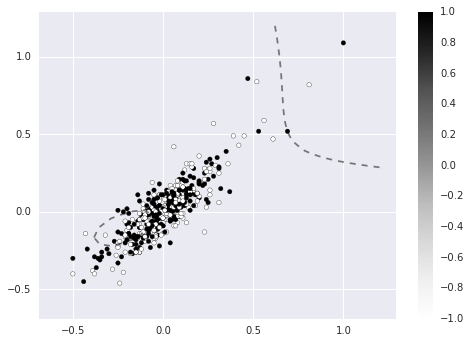

In [100]:

%matplotlib inline
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()


#plt.plot(xx, yy, '-k', label="non weighted div")

plt.scatter(features[:, 0], features[:, 1], c = labels)

plt.colorbar()
plot_svc_decision_function(clf)
#plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           # s=200, facecolors='none');

[-0.04637933  0.01104783]
[-0.03604358  0.01657267]
[ 0.04977531  0.00511331]


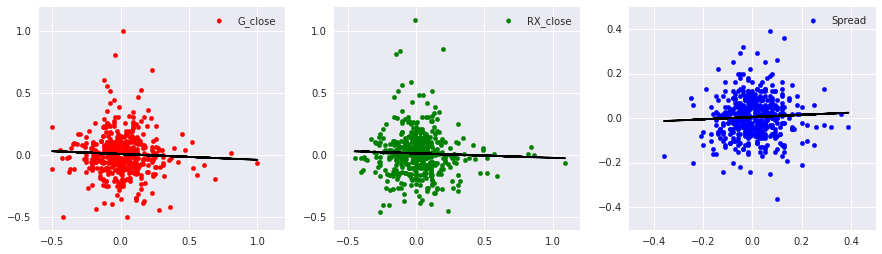

In [101]:
cols = iter(["r","g","b"])
c = returns.columns.get_level_values(0).unique()
plt.figure(figsize=(15,4))
for i in range(len(c)):
    sub = plt.subplot(1,3,i+1)
   
    x = returns.loc[slice(None),(c[i],"close_chg")][1:]
    y = returns.loc[slice(None),(c[i],"close_chg")].shift(1)[1:]
    sub.scatter(x,y, label = c[i], color=next(cols))
    sub.legend(loc='best')
    #print(x.values)
    #print(y.values)
    fit = np.polyfit(x.values,y.values,1)
    fit_fn = np.poly1d(fit) 
    print(fit)
    # fit_fn is now a function which takes in x and returns an estimate for y

    sub.plot(x.values, fit_fn(x.values), '-k')
    
    #print(c[i])
    #print(i)
    

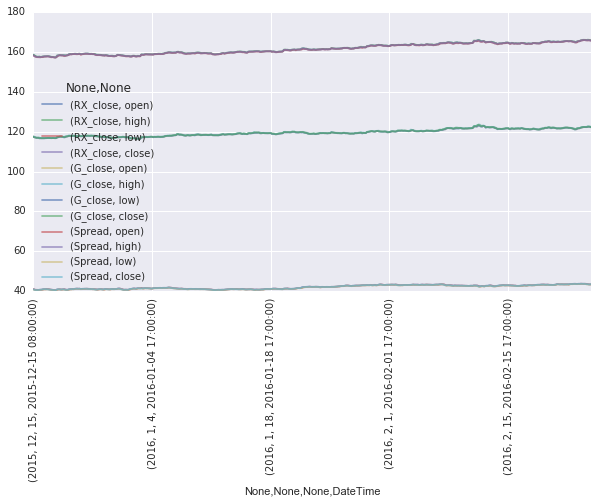

In [102]:
fig = plt.figure()
alpha_level = 0.65


#pairs['Spread'].plot(kind='line', label='spread', color='#FA0479', alpha=alpha_level)
rx_part.plot(kind='line', label='spread', alpha=alpha_level, rot = 90, figsize = (10,5), \
             grid = 'on')

#female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
#female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
#ax1.set_xticklabels(["Survived", "Died"], rotation=0)
#ax1.set_xlim(-1, len(female_highclass))
#plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

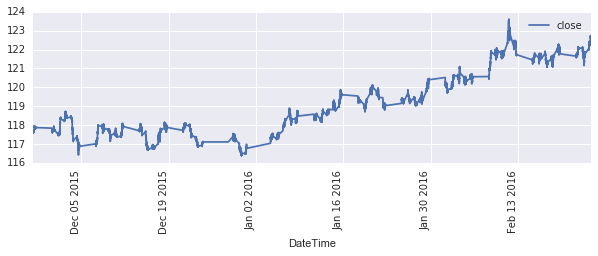

In [103]:
g_raw.plot(rot = 90, figsize=(10,3))

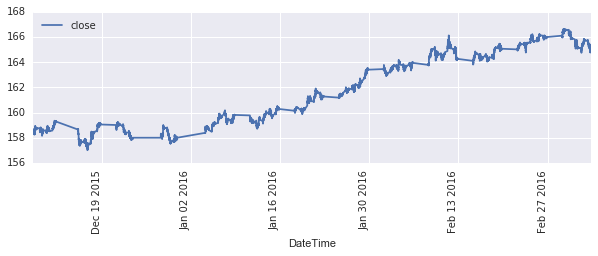

In [104]:
rx_raw.plot(rot = 90, figsize =(10,3))